In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

2022-06-20 11:18:51.520296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 11:18:51.520320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Data preparation

 As the Kaggle entry states, the folder 'dataset2-master' contains 2,500 augmented images with 4 additional subtype labels (JPEG + CSV).

In [2]:
# Make path variable and determine desired image dimensions
test_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TEST/'
train_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TRAIN/'

train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory=train_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory=test_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [3]:
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

(20, 120, 160, 3) float32
(20, 4) float32


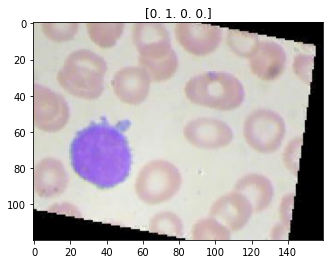

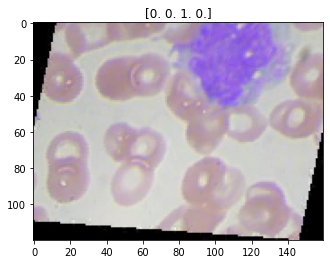

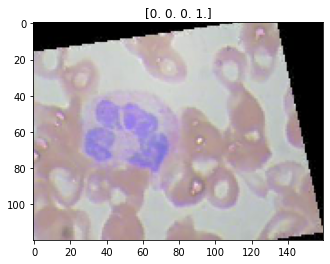

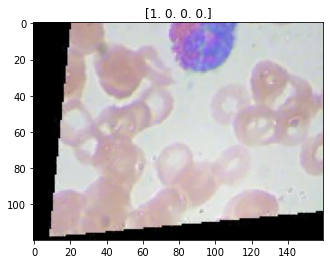

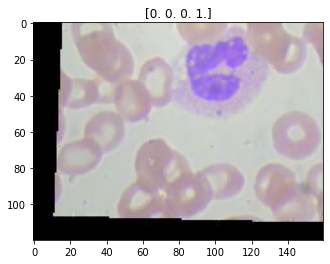

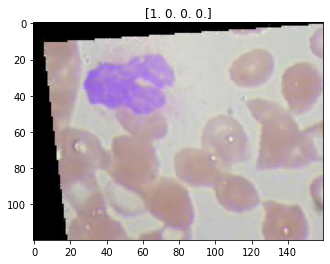

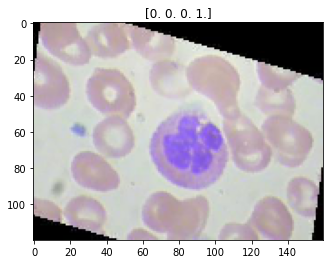

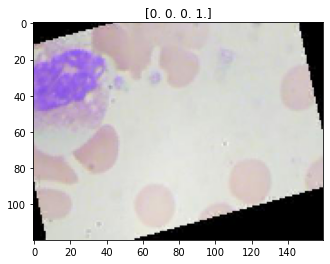

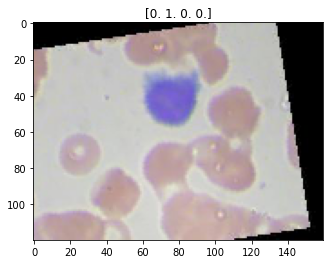

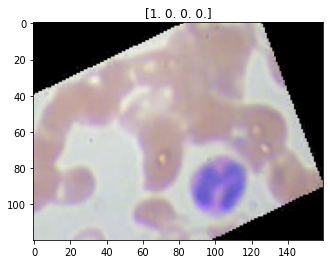

In [4]:
import matplotlib.pyplot as plt
for i in range(0, 10):
    plt.imshow(x_train[i])
    plt.title(str(y_train[i]))
    plt.show()

## Deep learning model creation

In [ ]:
#### Change to leaky relu! So far best
#### Perhaps higher dropout?

celclass = keras.models.Sequential()
celclass.add(keras.layers.InputLayer(input_shape=(120, 160, 3)))
# First convolutional layer
celclass.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
celclass.add(keras.layers.Dropout(0.3))

# Second convolutional layer
celclass.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
# celclass.add(keras.layers.Dropout(0.3))

# Third convolutional layer
celclass.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())

# Dense layer
celclass.add(keras.layers.Flatten())
celclass.add(keras.layers.Dense(units=64, activation='relu'))

# Output layer
celclass.add(keras.layers.Dense(units=4, activation='softmax'))

celclass.summary()

In [15]:
celclass.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.CategoricalAccuracy()
)

In [17]:
# history = celclass.fit(train_generator, validation_data=test_generator, epochs=30)

history = celclass.fit_generator(generator=train_generator,
                                 epochs=30,
                                 steps_per_epoch=300,
                                 validation_data=test_generator,
                                 validation_steps=50
                                )

history.history.keys()

Epoch 1/30


/tmp/ipykernel_286345/3336117131.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = celclass.fit_generator(generator=train_generator,


300/300 [==============================] - 90s 299ms/step - loss: 1.3891 - categorical_accuracy: 0.2576 - val_loss: 1.3873 - val_categorical_accuracy: 0.2280
Epoch 2/30
300/300 [==============================] - 100s 332ms/step - loss: 1.3808 - categorical_accuracy: 0.2783 - val_loss: 1.3823 - val_categorical_accuracy: 0.2990
Epoch 3/30
300/300 [==============================] - 94s 312ms/step - loss: 1.2218 - categorical_accuracy: 0.4361 - val_loss: 1.2249 - val_categorical_accuracy: 0.4210
Epoch 4/30
300/300 [==============================] - 91s 301ms/step - loss: 1.0408 - categorical_accuracy: 0.5424 - val_loss: 1.0241 - val_categorical_accuracy: 0.5260
Epoch 5/30
300/300 [==============================] - 88s 294ms/step - loss: 0.8919 - categorical_accuracy: 0.6063 - val_loss: 1.0583 - val_categorical_accuracy: 0.5160
Epoch 6/30
300/300 [==============================] - 89s 295ms/step - loss: 0.7351 - categorical_accuracy: 0.6683 - val_loss: 0.8013 - val_categorical_accuracy: 0.6

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [18]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

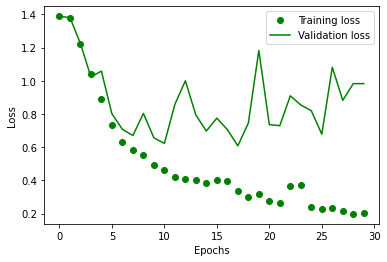

In [19]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

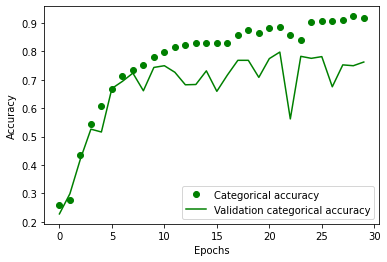

In [20]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()